In [1]:
#loading of libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load data training data ,validation data,testing data
X_1 = np.loadtxt('class1_train.txt')
X_2 = np.loadtxt('class2_train.txt')
X_3 = np.loadtxt('class3_train.txt')
X_1_val = np.loadtxt('class1_val.txt')
X_2_val = np.loadtxt('class2_val.txt')
X_3_val = np.loadtxt('class3_val.txt')
X_1_test = np.loadtxt('class1_test.txt')
X_2_test = np.loadtxt('class2_test.txt')
X_3_test = np.loadtxt('class3_test.txt')

Text(0, 0.5, 'X2')

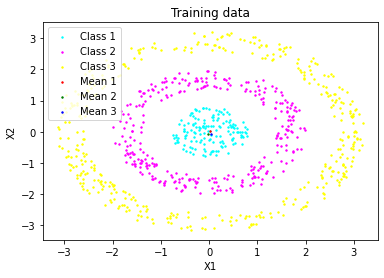

In [3]:
# simply visualising data and ploting of mean of training data for different classes
C1plt = plt.scatter(X_1[:, 0], X_1[:, 1], color = 'cyan', s = 2)
C2plt = plt.scatter(X_2[:, 0], X_2[:, 1], color = 'magenta', s = 2)
C3plt = plt.scatter(X_3[:, 0], X_3[:, 1], color = 'yellow', s = 2)
u_1 = np.mean(X_1,axis=0)
u_2 = np.mean(X_2,axis=0)
u_3 = np.mean(X_3,axis=0)
C4plt=plt.scatter(u_1[0], u_1[1], color = 'red', s = 2)
C5plt=plt.scatter(u_2[0], u_2[1], color = 'green', s = 2)
C6plt=plt.scatter(u_3[0], u_3[1], color = 'blue', s = 2)
plt.legend((C1plt, C2plt, C3plt, C4plt, C5plt, C6plt), ('Class 1', 'Class 2', 'Class 3','Mean 1','Mean 2','Mean 3'))
plt.title('Training data')
plt.xlabel('X1')
plt.ylabel('X2')

In [4]:
# find parameters
u_1 = np.mean(X_1, axis = 0)
u_2 = np.mean(X_2, axis = 0)
u_3 = np.mean(X_3, axis = 0)
s_1 = np.cov(X_1.T)
s_2 = np.cov(X_2.T)
s_3 = np.cov(X_3.T)
s = (s_1+s_2+s_3)/3
pc_1 = X_1.shape[0]/(X_1.shape[0]+X_2.shape[0]+X_3.shape[0])
pc_2 = X_2.shape[0]/(X_1.shape[0]+X_2.shape[0]+X_3.shape[0])
pc_3 = X_3.shape[0]/(X_1.shape[0]+X_2.shape[0]+X_3.shape[0])

In [5]:
# define functions g1, g2, g3
w11 = np.dot(np.linalg.pinv(s), u_1)
w10 = -(1/2)*np.dot(np.dot(u_1.T, np.linalg.pinv(s)), u_1)+np.log(pc_1)

w21 = np.dot(np.linalg.pinv(s), u_2)
w20 = -(1/2)*np.dot(np.dot(u_2.T, np.linalg.pinv(s)), u_2)+np.log(pc_2)

w31 = np.dot(np.linalg.pinv(s), u_3)
w30 = -(1/2)*np.dot(np.dot(u_3.T, np.linalg.pinv(s)), u_3)+np.log(pc_3)
    
def g1(x):
    return np.dot(w11.T, x)+w10
def g2(x):
    return np.dot(w21.T, x)+w20
def g3(x):
    return np.dot(w31.T, x)+w30

In [6]:
# classifier
def predict(x):
    return np.argmax([g1(x), g2(x), g3(x)])

In [7]:
# confusion matrix
# rows: predicted classes, columns: true classes
ConfusionMatrix = np.zeros((3, 3))
X = [X_1_test, X_2_test, X_3_test]
for i in range(3):
    for x in X[i]:
        ConfusionMatrix[predict(x), i] = ConfusionMatrix[predict(x), i]+1
pd.DataFrame(ConfusionMatrix, ['Predicted 1', 'Predicted 2', 'Predicted 3'],['True 1', 'True 2', 'True 3'])

,True 1,True 2,True 3
Predicted 1,0.0,0.0,0.0
Predicted 2,0.0,0.0,0.0
Predicted 3,60.0,120.0,160.0


In [8]:
# performance measures  Accuracy ,Precision,Recall,F_measure,mean Accuracy,mean Precision,mean Recall,mean F_measure
N = np.sum(ConfusionMatrix, axis = 0)
TP = np.diagonal(ConfusionMatrix)
TN = np.sum(TP)-TP
FP = np.sum(ConfusionMatrix, axis = 1)-TP
FN = np.sum(ConfusionMatrix, axis = 0)-TP
Accuracy = 100*TP/N
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F_measure = 2*Precision*Recall/(Precision+Recall)
print({
    'Accuracy: ': Accuracy.tolist(),
    'Mean Accuracy': np.mean(Accuracy)
})
print({
    'Precision: ': Precision.tolist(),
    'Mean Precision': np.mean(Precision)
})
print({
    'Recall: ': Recall.tolist(),
    'Mean Recall': np.mean(Recall)
})
print({
    'F_measure: ': F_measure.tolist(),
    'Mean F_measure': np.mean(F_measure)
})

{'Accuracy: ': [0.0, 0.0, 100.0], 'Mean Accuracy': 33.333333333333336}
{'Precision: ': [nan, nan, 0.47058823529411764], 'Mean Precision': nan}
{'Recall: ': [0.0, 0.0, 1.0], 'Mean Recall': 0.3333333333333333}
{'F_measure: ': [nan, nan, 0.6399999999999999], 'Mean F_measure': nan}


<ipython-input-8-33dc63712e20>:8: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)


IndexError: too many indices for array

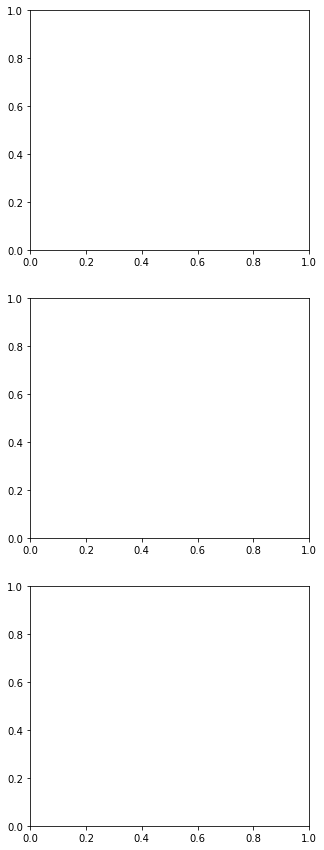

In [9]:
# decision region plot for every pair of classes with the respective training data superimposed
Nclasses = 3
Nfigures = (Nclasses)*(Nclasses-1)//2
plt.rcParams['figure.figsize'] = [5, 5*Nfigures]
fig, axs = plt.subplots(Nfigures, 1)

x_min = min([min(X_1[:, 0]), min(X_2[:, 0]), min(X_3[:, 0])])
y_min = min([min(X_1[:, 1]), min(X_2[:, 1]), min(X_3[:, 1])])
x_max = max([max(X_1[:, 0]), max(X_2[:, 0]), max(X_3[:, 0])])
y_max = max([max(X_1[:, 1]), max(X_2[:, 1]), max(X_3[:, 1])])

g = [g1, g2, g3]
bg = ['cyan', 'magenta', 'yellow']
fc = ['blue', 'red', 'orange']
X = [X_1, X_2, X_3]

i = 0
for c1 in range(1, Nclasses+1):
    for c2 in range(c1+1, Nclasses+1):
        x_1 = []
        x_2 = []
        for x in np.arange(x_min, x_max, 0.1):
            for y in np.arange(y_min, y_max, 0.1):
                c = np.argmax([g[c1-1]([x, y]), g[c2-1]([x, y])])
                if c == 0:
                    x_1.append([x, y])
                elif c == 1:
                    x_2.append([x, y])
        x_1 = np.array(x_1)
        x_2 = np.array(x_2)
        axs[i].scatter(x_1[:, 0], x_1[:, 1], color = bg[c1-1], s = 2)
        axs[i].scatter(x_2[:, 0], x_2[:, 1], color = bg[c2-1], s = 2)
        C1plt = axs[i].scatter(X[c1-1][:, 0], X[c1-1][:, 1], color = fc[c1-1], s = 2)
        C2plt = axs[i].scatter(X[c2-1][:, 0], X[c2-1][:, 1], color = fc[c2-1], s = 2)
        axs[i].set_title('Class '+str(c1)+' vs Class '+str(c2))
        axs[i].set_xlabel('X1')
        axs[i].set_ylabel('X2')
        axs[i].legend((C1plt, C2plt), ('Class '+str(c1), 'Class '+str(c2)))
        i = i+1

In [ ]:
# Decision region plot for all the classes together with the training data superposed
x_min = min([min(X_1[:, 0]), min(X_2[:, 0]), min(X_3[:, 0])])
y_min = min([min(X_1[:, 1]), min(X_2[:, 1]), min(X_3[:, 1])])
x_max = max([max(X_1[:, 0]), max(X_2[:, 0]), max(X_3[:, 0])])
y_max = max([max(X_1[:, 1]), max(X_2[:, 1]), max(X_3[:, 1])])
x_1 = []
x_2 = []
x_3 = []
for x in np.arange(x_min, x_max, 0.01):
    for y in np.arange(y_min, y_max, 0.01):
        c = predict([x, y])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_2.append([x, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_3 = np.array(x_3)
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
plt.scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
plt.scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
C1plt = plt.scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
C2plt = plt.scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
C3plt = plt.scatter(X_3[:, 0], X_3[:, 1], color = 'green', s = 2)
plt.title('Decision regions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend((C1plt, C2plt, C3plt), ('Class 1', 'Class 2', 'Class 3'))

In [ ]:
# Decision region plot for all the classes together with the testing data superposed

x_min = min([min(X_1_test[:, 0]), min(X_2_test[:, 0]), min(X_3_test[:, 0])])
y_min = min([min(X_1_test[:, 1]), min(X_2_test[:, 1]), min(X_3_test[:, 1])])
x_max = max([max(X_1_test[:, 0]), max(X_2_test[:, 0]), max(X_3_test[:, 0])])
y_max = max([max(X_1_test[:, 1]), max(X_2_test[:, 1]), max(X_3_test[:, 1])])
x_1 = []
x_2 = []
x_3 = []
for x in np.arange(x_min, x_max, 0.01):
    for y in np.arange(y_min, y_max, 0.01):
        c = predict([x, y])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_2.append([x, y])
        else:
            x_3.append([x, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_3 = np.array(x_3)
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
plt.scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
plt.scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
C1plt = plt.scatter(X_1_test[:, 0], X_1_test[:, 1], color = 'blue', s = 2)
C2plt = plt.scatter(X_2_test[:, 0], X_2_test[:, 1], color = 'red', s = 2)
C3plt = plt.scatter(X_3_test[:, 0], X_3_test[:, 1], color = 'green', s = 2)
plt.title('Decision regions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend((C1plt, C2plt, C3plt), ('Class 1', 'Class 2', 'Class 3'))